In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/california_housing_train.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


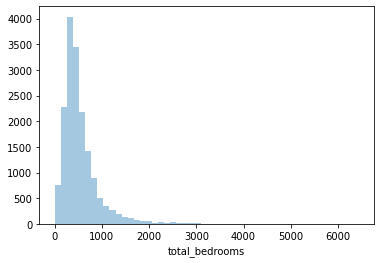

In [4]:
sns.distplot(df['total_bedrooms'], kde=False) # Histograma

In [5]:
ss = StandardScaler()
df['total_bedrooms_ss'] = ss.fit_transform(np.array(df['total_bedrooms']).reshape(-1, 1))

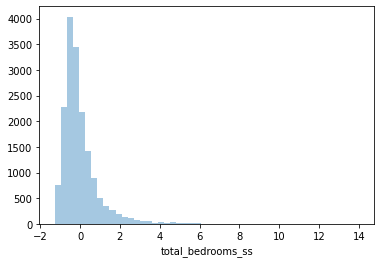

In [6]:
sns.distplot(df['total_bedrooms_ss'], kde=False)

In [7]:
mm = MinMaxScaler()
df['total_bedrooms_mm'] = mm.fit_transform(np.array(df['total_bedrooms']).reshape(-1, 1))

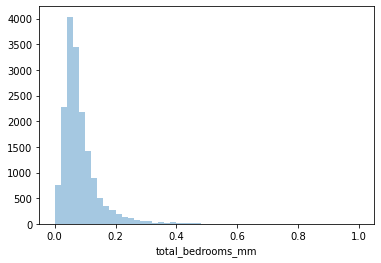

In [8]:
sns.distplot(df['total_bedrooms_mm'], kde=False)

In [9]:
rb = RobustScaler()
df['total_bedrooms_rb'] = rb.fit_transform(np.array(df['total_bedrooms']).reshape(-1, 1))

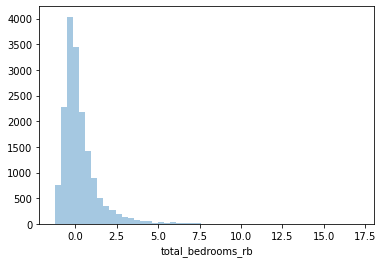

In [10]:
sns.distplot(df['total_bedrooms_rb'], kde=False)

In [14]:
pw = PowerTransformer(method='box-cox')
df['total_bedrooms_pw'] = pw.fit_transform(np.array(df['total_bedrooms']).reshape(-1, 1))

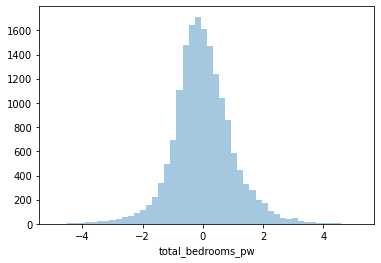

In [15]:
sns.distplot(df['total_bedrooms_pw'], kde=False)

In [16]:
# Invertendo a transformada
pw.inverse_transform(np.array(df['total_bedrooms_pw']).reshape(-1, 1))

array([[1283.],
       [1901.],
       [ 174.],
       ...,
       [ 531.],
       [ 552.],
       [ 300.]])

In [17]:
# 1º Comentário: aplicar a transformação em todas as colunas.

# Primeiramente, colocando isso em range positivo.
mm_tudo = MinMaxScaler(feature_range=(0.00001, 1.0))
dados = mm_tudo.fit_transform(df)

# Depois aplicando o boxcox.
bc_tudo = PowerTransformer(method='box-cox')
dados = bc_tudo.fit_transform(dados)
dados

array([[ 2.66776194, -0.51415475, -1.07178653, ...,  1.69805925,
         1.69805924,  1.70369092],
       [ 2.58516237, -0.38606105, -0.7255969 , ...,  2.44500852,
         2.44500851,  2.45556913],
       [ 2.53872369, -0.86543403, -0.89656139, ..., -1.23850879,
        -1.23850879, -1.24056992],
       ...,
       [-2.29653389,  2.07656862, -0.89656139, ...,  0.24104972,
         0.24104972,  0.23970039],
       [-2.29653389,  2.06766248, -0.7255969 , ...,  0.29930999,
         0.29931   ,  0.29815102],
       [-2.31660005,  1.77427042,  1.75296184, ..., -0.56136025,
        -0.56136024, -0.56425358]])

In [19]:
#Invertendo as transformações:
inv_bc_tudo = bc_tudo.inverse_transform(dados)
inv_mm_tudo = mm_tudo.inverse_transform(inv_bc_tudo)
inv_mm_tudo

array([[-1.14310000e+02,  3.41900000e+01,  1.50000000e+01, ...,
         1.98944755e-01,  2.41708185e+00,  1.69627460e+00],
       [-1.14470000e+02,  3.44000000e+01,  1.90000000e+01, ...,
         2.94847921e-01,  4.17651246e+00,  2.43796367e+00],
       [-1.14560000e+02,  3.36900000e+01,  1.70000000e+01, ...,
         2.68466791e-02, -7.40213523e-01, -1.24177853e+00],
       ...,
       [-1.24300000e+02,  4.18400000e+01,  1.70000000e+01, ...,
         8.22470515e-02,  2.76156584e-01,  2.43056699e-01],
       [-1.24300000e+02,  4.18000000e+01,  1.90000000e+01, ...,
         8.55058970e-02,  3.35943060e-01,  3.01337425e-01],
       [-1.24350000e+02,  4.05400000e+01,  5.20000000e+01, ...,
         4.63997517e-02, -3.81494662e-01, -5.61114169e-01]])

In [20]:
df_invertido = pd.DataFrame(data=inv_mm_tudo, columns=df.columns.values)
df_invertido

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedrooms_ss,total_bedrooms_mm,total_bedrooms_rb,total_bedrooms_pw
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1.764204,0.198945,2.417082,1.696275
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,3.230441,0.294848,4.176512,2.437964
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,-0.866956,0.026847,-0.740214,-1.241779
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,-0.480230,0.052142,-0.276157,-0.405203
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,-0.506328,0.050435,-0.307473,-0.450088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,-0.344995,0.060987,-0.113879,-0.189494
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,-0.027073,0.081782,0.267616,0.234584
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,-0.019955,0.082247,0.276157,0.243057
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,0.029868,0.085506,0.335943,0.301337


In [21]:
# Como faço essas transformações em cenários com dados de treinamento e teste?

# Gerar as transformações no conjunto de treinamento, e aplicar tanto no treinamento quanto no teste.

In [22]:
# Separar os dados em treinamento e teste.
df_treino = df[:10000] # 10k primeiras linhas.
df_teste = df[10001:] # restante.

In [25]:
# Criando as transformações:

mm = MinMaxScaler(feature_range=(0.00001, 1.0))
bc = PowerTransformer(method='box-cox')

mm.fit(df_treino)
df_treino_mm = mm.transform(df_treino)

bc.fit(df_treino_mm)
df_treino_mm_bc = bc.transform(df_treino_mm)

In [26]:
# Aplicando nos dados de teste:

df_teste_mm = mm.transform(df_teste)
df_teste_mm = pd.DataFrame(data=df_teste_mm, columns=df.columns.values)
df_teste_mm[df_teste_mm <= 0] = 0.00001 # arrumando valores negativos que podem ter aparecido.
df_teste_mm_bc = bc.transform(df_teste_mm)

Valores faltantes:

In [42]:
df_titanic = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/titanic.csv')

In [29]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
# Somando valores faltantes por linha.
df_titanic.isnull().sum(axis=1)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64

In [33]:
df_titanic.isnull().sum(axis=1).nlargest(10)

5     2
17    2
19    2
26    2
28    2
29    2
32    2
36    2
42    2
45    2
dtype: int64

In [43]:
df_titanic.drop('Cabin', axis=1, inplace=True)

In [36]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [37]:
df_titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

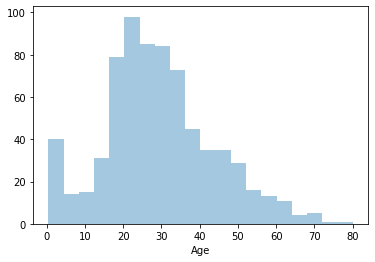

In [38]:
sns.distplot(df_titanic['Age'], kde=False)

In [45]:
### Imputando Age com a média:
mean_ = df_titanic['Age'].mean()
df_titanic['Age_mean'] = df_titanic['Age'].fillna(mean_)

df_titanic['Age_mean'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age_mean, dtype: float64

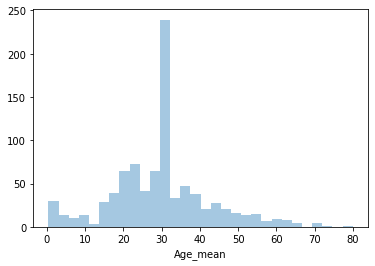

In [46]:
sns.distplot(df_titanic['Age_mean'], kde=False)

In [47]:
### Imputando Age com a mediana
mediana = df_titanic['Age'].median() #quantile(0.5)

df_titanic['Age_mediana'] = df_titanic['Age'].fillna(mediana)

In [48]:
df_titanic["Age_mediana"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age_mediana, dtype: float64

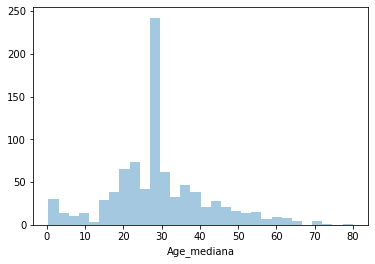

In [49]:
sns.distplot(df_titanic['Age_mediana'], kde=False)

In [50]:
df_titanic['Embarked'].fillna('U', inplace=True)

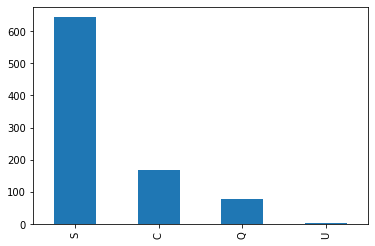

In [51]:
df_titanic['Embarked'].value_counts().plot(kind='bar')

In [53]:
# One-hot-encoding -> pega as colunas categórias, e, para cada valor único da coluna, ele cria uma nova coluna com aquele valor específico.
# Embarked -> S, C, Q, U: Embarked_S, Embarked_C, Embarked_Q, Embarked_U

df_onehot = pd.get_dummies(df_titanic)

In [54]:
df_onehot.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_mean,Age_mediana,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem","Name_Alexander, Mr. William","Name_Alhomaki, Mr. Ilmari Rudolf","Name_Ali, Mr. Ahmed","Name_Ali, Mr. William","Name_Allen, Miss. Elisabeth Walton","Name_Allen, Mr. William Henry","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Allum, Mr. Owen George","Name_Andersen-Jensen, Miss. Carla Christine Nielsine","Name_Anderson, Mr. Harry","Name_Andersson, Master. Sigvard Harald Elias","Name_Andersson, Miss. Ebba Iris Alfrida","Name_Andersson, Miss. Ellis Anna Maria","Name_Andersson, Miss. Erna Alexandra","Name_Andersson, Miss. Ingeborg Constanzia","Name_Andersson, Miss. Sigrid Elisabeth","Name_Andersson, Mr. Anders Johan","Name_Andersson, Mr. August Edvard (""Wennerstrom"")","Name_Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)",...,Ticket_SOTON/O.Q. 392087,Ticket_SOTON/O2 3101272,Ticket_SOTON/O2 3101287,Ticket_SOTON/OQ 3101316,Ticket_SOTON/OQ 3101317,Ticket_SOTON/OQ 392076,Ticket_SOTON/OQ 392082,Ticket_SOTON/OQ 392086,Ticket_SOTON/OQ 392089,Ticket_SOTON/OQ 392090,Ticket_STON/O 2. 3101269,Ticket_STON/O 2. 3101273,Ticket_STON/O 2. 3101274,Ticket_STON/O 2. 3101275,Ticket_STON/O 2. 3101280,Ticket_STON/O 2. 3101285,Ticket_STON/O 2. 3101286,Ticket_STON/O 2. 3101288,Ticket_STON/O 2. 3101289,Ticket_STON/O 2. 3101292,Ticket_STON/O 2. 3101293,Ticket_STON/O 2. 3101294,Ticket_STON/O2. 3101271,Ticket_STON/O2. 3101279,Ticket_STON/O2. 3101282,Ticket_STON/O2. 3101283,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,1,0,3,22.0,1,0,7.2500,22.000000,22.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,38.000000,38.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,26.000000,26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,35.000000,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,35.000000,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,6,0,3,NaN,0,0,8.4583,29.699118,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,7,0,1,54.0,0,0,51.8625,54.000000,54.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,8,0,3,2.0,3,1,21.0750,2.000000,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,9,1,3,27.0,0,2,11.1333,27.000000,27.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,10,1,2,14.0,1,0,30.0708,14.000000,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
